<a href="https://colab.research.google.com/github/faryal-art/week4_pytorch/blob/main/ch3_Computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch:3 Computer vision and  Convolutional Neural Network with Pytorch

**Computer vision** is the art of teaching a computer to see.

We will not tell the computer what it is it will learn it itself

* For example, it could involve building a model to classify whether a photo is of a cat or a dog (**binary classification**).
.

* Or whether a photo is of a cat, dog or chicken (**multi-class classification**).

* Or identifying where a car appears in a video frame (**object detection**).

* Or figuring out where different objects in an image can be separated (**panoptic segmentation**).





### Types of problems computer vision deals with
* Binary classification
* Multiclass calsification
* Object detection
* Panoptic segmentation(identify different parts of images)

## What are we going to cover
1. Getting vision dataset to work with udsing torchvision.datasets
2. Architecture of a convolutional neural network(CNN) with pytorch
3.  An end to end image classification problem
4.  Steps in modelling with CNNS in pytorch
  * Creating a CNN model with pytorch
  * picking loss function and optimizer
  * Training a model
  * Evaluating a model


## Architecture of a  CNN
* Input images (The image in which we have to discover patterns )
* Input layer (Takes in  target images and preprocess them for further layers )
* Convolution layer (Extracts /learns most important features from target images )
* Hidden activation/ non-linear activation (Adds non-linearity to learned featurs _
* pooling layer( Reduces the dimensionality of learned features )
* output layer /linear layer (take learned features and outputs them in shape of target labels )
* ouput activation (convert  output logits to prediction probabilities)



## 0. Computer vision libraries in pytorch
* `torchvision.dataset` -> get dataset and data loading functions fo computer vision
 * `torchvision.models` -> get pretrained computer vision models that you can use for your own problems
 * `torchvision.transforms` ->functions for manuplating your vision data (images) to be suitable for use with an ML model . it turns image data into numbers so we can use it with a machine learning model
 * `torch.utlis.data.Datasets` -> Base dataset class for pytorch( if we want to create our own dataset)
 * `torch.utils.data.DataLoader` -> creates a Python iterable over a dataset

In [ ]:
#import pytorch
import torch
from torch import nn

#import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# import matplotlib for visualization
import matplotlib.pyplot as plt

#  check versions
print(torch.__version__)
print(torchvision.__version__)

2.6.0+cu124
0.21.0+cu124


###1. Getting a dataset
The dataset we are using is FashionMNist from torchvision.dataset


In [ ]:
from torchvision import datasets
#training data
train_data=datasets.FashionMNIST(
    root="data",# where we want to download the data / store the data (folder name )
    train=True, #do we want the training dataset?
    download=True, # do we want to download it yes/no?
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data?
    target_transform=None # how do we want to transform labels/targets?

)
test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None


)

100%|██████████| 26.4M/26.4M [00:01<00:00, 13.4MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 212kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.93MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 26.9MB/s]


In [ ]:
# checking parameters and atributes of our data
# check of both tarin and test data
len(train_data),len(test_data)

(60000, 10000)

In [ ]:
# first training sample
image,label=train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
# labels name
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx=train_data.class_to_idx
class_to_idx


{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
# check the target data
label=train_data.targets
label[:10]

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])

### 1.1 check input and output shapes of data

In [ ]:
# shape
print(f"image shape: {image.shape} ->[color channel,height ,width ]")
print(f"No of image labels : {label}")

image shape: torch.Size([1, 28, 28]) ->[color channel,height ,width ]
No of image labels : tensor([9, 0, 0,  ..., 3, 0, 5])


As we can see the shape shows us that image has only one color channel  [1,28,28]  

As grey scale images has only one color channel

### 1.2 Visualizing our images

image shape: torch.Size([1, 28, 28])


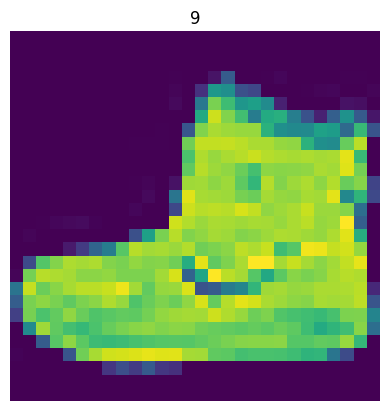

In [ ]:
 import matplotlib.pyplot as plt
 image,label=train_data[0]
 print(f"image shape: {image.shape}")
 plt.imshow(image.squeeze()); # .squeeze() to remove the extra dimension that is causing error [1,28,28] ->[28,28]
 plt.title(label) # label 9-> Ankle boot
 plt.axis(False);


image shape: torch.Size([1, 28, 28])


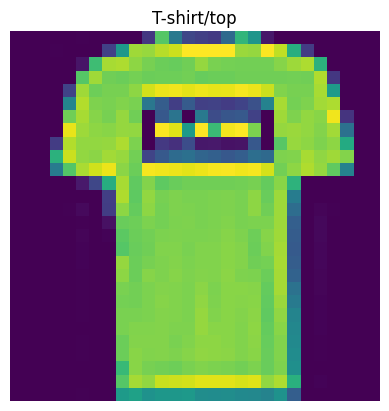

In [ ]:
import matplotlib.pyplot as plt
image,label=train_data[1]
print(f"image shape: {image.shape}")
image
plt.imshow(image.squeeze()); # .squeeze() to remove the extra dimension that is causing error [1,28,28] ->[28,28]
plt.title(class_names[label])
plt.axis(False);


image shape : torch.Size([1, 28, 28])


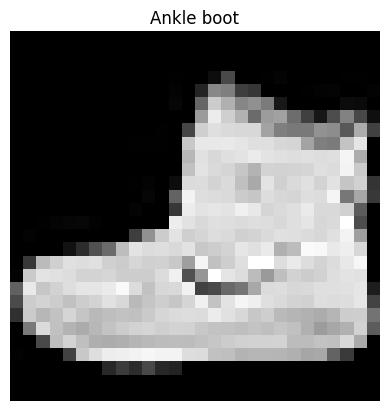

In [ ]:
# plot image 0 in grey scale
image,label=train_data[0]
print(f"image shape : {image.shape}")
plt.imshow(image.squeeze(),cmap="grey")
plt.title(class_names[label])
plt.axis(False);

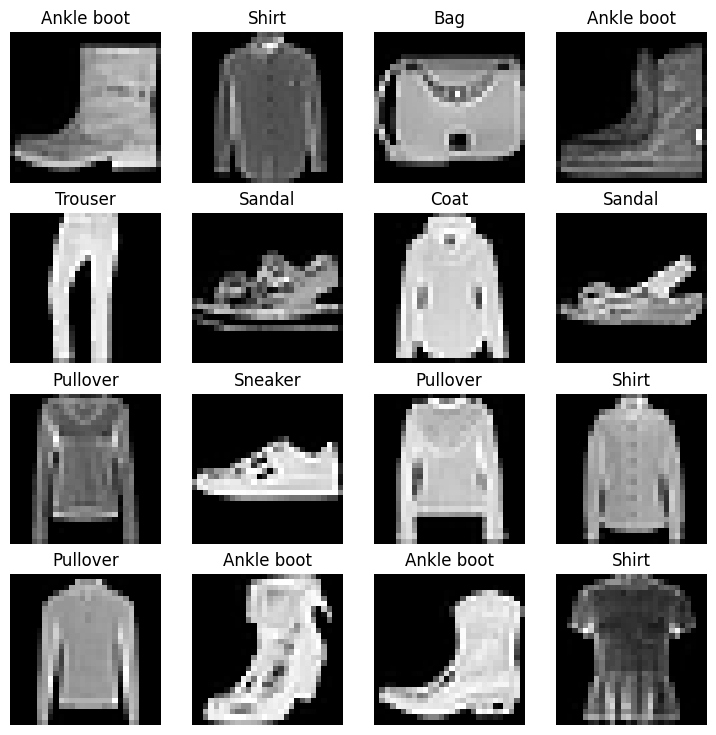

In [ ]:
#plot more random image
torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows,col=4,4
for i in range (1,rows*col+1):
  random_index=torch.randint(0,len(train_data) , size=[1]).item() # randint will generate a random number range from 0 to the lenght of train data thst is (60000) in the case
  img,label=train_data[random_index]
  fig.add_subplot(rows,col,i)
  plt.imshow(img.squeeze(),cmap="grey" )
  plt.title(class_names[label])
  plt.axis(False);




Do you think these items of clothing (images ) coulde be modelled with pure linear lines?  or do we need non-linearity

In [ ]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

## Prepare dataloader
Right now our data is in th form of pytorch datasets


We need to convert it from dataset (which is collection of all our data ) to dataloader

Dataloader turns our data into python iterable

More specifically  we need to turn out data into batches(or mini-batches)

Why would we do this?
1. it is more computationally efficient, as we break down our train_dataset(instead of passing all 60000 images at once /one hit ) to 32 images at a time(batch size of 32.
2. It gives our neural network more chances to update gradient per epoch.  


In [ ]:
# turn dataset into dataloader
from torch.utils.data import DataLoader
BATCH_SIZE=32

#tarin dataloader
train_dataloader=DataLoader(dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)
#shuffle enable the model to learn/ explore the patterns instead of remembering the same order in which images are present
#test dataloader
test_dataloader=DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)


In [ ]:
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7bcca8a26410>,
 <torch.utils.data.dataloader.DataLoader at 0x7bcca8b15790>)

In [ ]:
# let's check what we have created
print(f"length of train_dataloader: {len(train_dataloader)} , Batch size: {BATCH_SIZE}")
print(f"lenght of test_dataloader: {len(test_dataloader)}, Batch size: {BATCH_SIZE}")



length of train_dataloader: 1875 , Batch size: 32
lenght of test_dataloader: 313, Batch size: 32


In [ ]:
# check out what is inside train_dataloader
train_feature_batch,train_label_batch=next(iter(train_dataloader))

print(f"shape of train_feature_batch: {train_feature_batch.shape}")
print(f"shape of train_label_batch: {train_label_batch.shape}")

shape of train_feature_batch: torch.Size([32, 1, 28, 28])
shape of train_label_batch: torch.Size([32])


torch.shape([32,1,28,28]) -> 32 is batch size, 1 is color channel , 28 is height , 28 is width

image shape: torch.Size([1, 28, 28])
label: 8 , label shape: torch.Size([])


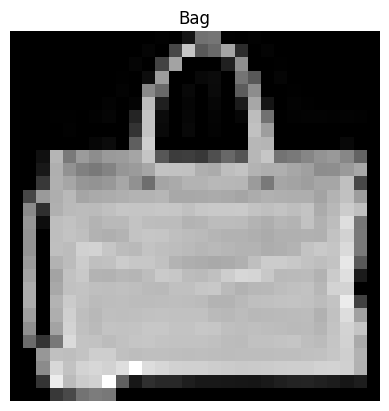

In [ ]:
# view a sample
#torch.manual_seed(42)
random_index=torch.randint(0,len(train_feature_batch), size=[1]).item()
img,label=train_feature_batch[random_index], train_label_batch[random_index]
plt.imshow(img.squeeze(),cmap="grey")
plt.title(class_names[label])
plt.axis(False)

print(f"image shape: {img.shape}")
print(f"label: {label} , label shape: {label.shape}")



## 3  Model 0  : Build a baseline model
When we are starting a series of machine learning modelling experiments , it's best pratice to start with baseline model

* A baseline model is a simple model and we will try and improve upon subsequent models/experiments

* In other words start simply and add complexity when necessary

**CNN Flow with Flatten**
1. **Input image** → (batch_size, channels, height, width)

2. **Convolution + Pooling layers** → Extract spatial features
(output is still 4D: batch, channels, height, width)

3. **Flatten layer** → Converts (batch, channels, height, width) → (batch, features)
✅ This is needed because fully connected (dense) layers expect a 2D input (batch_size, number_of_features).

4. **Fully Connected Layers (Dense/Linear)** → Make predictions.

5. **Output layer** → Final class scores / probabilities.



In [ ]:
# create a flatten layer
# nn.Flatten() take a multidimensional tensor and reshapes it into 1D vector
flatten_model=nn.Flatten()

#get a single sampple from train_feature_batch
x=train_feature_batch[0]
print(f"Shape of image tensor before flattening: \n {x.shape} ->[color_channels,height,wigth]")

x_flattened= flatten_model(x)
print(f"Shape on image tensor after flattening: \n {x_flattened.shape} ->[color_channels,height*width]")

Shape of image tensor before flattening: 
 torch.Size([1, 28, 28]) ->[color_channels,height,wigth]
Shape on image tensor after flattening: 
 torch.Size([1, 784]) ->[color_channels,height*width]


In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int,output_shape:int):
    super().__init__()
    self.layer_stack= nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units, # The input shape of the second linear layer should be the hidden_units
                  out_features=output_shape)
    )
  def forward(self,x):
    return self.layer_stack(x)

In [ ]:
# setup instance of our model
torch.manual_seed(42)
model_0=FashionMNISTModelV0(input_shape=784,
                            hidden_units=10,
                            output_shape=len(class_names)).to('cpu')
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x=torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### 3.1 setup loss ,optimizer , evaluation metrics

In case of multi  class data

* loss function= `nn.CressEntropyLoss()`
* optimizer=`torch.optim.SGD`
* evaluation metric=`Accuracy`

In [ ]:
import requests
from pathlib import Path

# download helper function from learn pytorch repo
if Path("helper_functions.py").is_file():
  print("helper_functios.py already exists")
else:
  print("downloading helper_function.py file")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)






downloading helper_function.py file


In [ ]:
## import accuracy metric from helper_functions
from helper_functions import accuracy_fn

# setuo loss function and optmizer
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.1)


### 3.2 Creating a function to time our experiments

Thing usually used to track for evaluating model's performance
1. Model's performance(loss and accuracy value)
2. How fast it runs


In [ ]:
from timeit import default_timer as timer
def print_train_time(
    start:float,
    end:float,
    device:torch.device=None):

  """ Print difference between start and edn time """
  total_time=end-start
  print(f"Traint ime on : {device} total time: {total_time:3f} secnds")
  return total_time


In [ ]:
start_time=timer()

#some code....

end_time=timer()
print_train_time(start=start_time,end=end_time , device="cpu")


Traint ime on : cpu total time: 0.000026 secnds


2.620300000444331e-05

### 3.3 Create a training loop and train the model on batches
1. loop through epochs
2. loop through training batches
   * perform training steps
   * calculate the train loss per epoch   
3. loop through the testing loop
   * perform testing steps
   *calculate the test loss per batch
4. print out what is happening
5. time it all


In [ ]:
#  import tqdm whicg creates a progress bar helps in tracking
from tqdm.auto import tqdm # .auto recognize what computing environment we are using and give us progress bar that suits best to our problem

# set manual seed and start timer
torch.manual_seed(42)
train_time_start_on_cpu=timer()

# set no of epochs (less epoch for faster training time)
epochs=3

#create training and testing loop
for epoch in range(epochs): #if you want a progress bar you can write tqdm(range(epoch)) in place of range(epoch)
  print(f"epoch: {epoch} \n-----")

  #training
  train_loss=0
  #Add a loop to loop through training batches
  for batch,(X,y) in enumerate(train_dataloader):
    #train the model
    model_0.train()

    # do a forward pass
    train_pred=model_0(X)

    # calculate the loss
    loss=loss_fn(train_pred,y)
    train_loss += loss

    #optimize zero grad
    optimizer.zero_grad()

    # back propagation
    loss.backward()

    # optimizer step
    optimizer.step()

    #print whats happening
    if batch % 400 ==0:
      print(f"looked at : {batch * len(X)}/{len(train_dataloader.dataset)} samples.")
  #devide tarin loss by the length of train dataloader(train_loss average per batch)
  train_loss /= len(train_dataloader)

  ## testing loop
  test_loss, test_acc =0,0
  model_0.eval()
  with torch.inference_mode():
    for x_test,y_test in test_dataloader:

      # forward pass
      test_pred=model_0(x_test)

      #calculate the loss
      test_loss += loss_fn(test_pred,y_test)

      # accuracy
      test_acc +=accuracy_fn(y_test,test_pred.argmax(dim=1))

   # calculate the test_loss aveage per batch
    test_loss /= len(test_dataloader)

   #accuracy average per batch
    test_acc /= len(test_dataloader)

#print what is happening
  print(f" \n train loss: {train_loss:.4f} , test loss: {test_loss:.4f}, test_acc: {test_acc:.4f}")

 #calculate training time
train_time_end_on_cpu=timer()
total_train_time_model_0=print_train_time(train_time_start_on_cpu,
                                          train_time_end_on_cpu,
                                          str(next(model_0.parameters()).device))







epoch: 0 
-----
looked at : 0/60000 samples.
looked at : 12800/60000 samples.
looked at : 25600/60000 samples.
looked at : 38400/60000 samples.
looked at : 51200/60000 samples.
 
 train loss: 0.5904 , test loss: 0.5095, test_acc: 82.0387
epoch: 1 
-----
looked at : 0/60000 samples.
looked at : 12800/60000 samples.
looked at : 25600/60000 samples.
looked at : 38400/60000 samples.
looked at : 51200/60000 samples.
 
 train loss: 0.4763 , test loss: 0.4799, test_acc: 83.1969
epoch: 2 
-----
looked at : 0/60000 samples.
looked at : 12800/60000 samples.
looked at : 25600/60000 samples.
looked at : 38400/60000 samples.
looked at : 51200/60000 samples.
 
 train loss: 0.4550 , test loss: 0.4766, test_acc: 83.4265
Traint ime on : cpu total time: 32.320505 secnds


## 4 Make prediction and do evaluation

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               ): # Added device parameter

  """ Return dictionary containing the results of model predicting on data_loader"""
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:

      # Put data on target device
      X, y = X.to(device), y.to(device)

      #forward pass / make predictions
      y_preds=model(X)

      #calculate the loss
      loss += loss_fn(y_preds,y)

      #accuracy
      acc += accuracy_fn(y,y_preds.argmax(dim=1))
    # scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)
  return  { "model_name  " : model.__class__.__name__, # only works if modek is created with class
           "model_loss" : loss.item(),
            "model_acc" : acc}

#### setup device agnoistic code

In [ ]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
! nvidia-smi

Sat Aug  9 11:07:32 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   47C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## 6 Model 1: Building a better model with non-linearity



In [ ]:
# creating model with non-linerity
import torch # Ensure torch is imported
class FashionMNISTModelV1(torch.nn.Module):
  def __init__(self,
               input_shape:  int,
               hidden_units: int,
               output_shape:int
               ):
    super(). __init__()
    self.layer_stack=torch.nn.Sequential(
        torch.nn.Flatten(),
        torch.nn.Linear(in_features=input_shape, # Changed nn.Linear to torch.nn.Linear
                  out_features=hidden_units),
        torch.nn.ReLU(), # Changed nn.ReLU() to torch.nn.ReLU()
        torch.nn.Linear(in_features=hidden_units, # Changed nn.Linear to torch.nn.Linear
                 out_features=output_shape)
    )

  def forward(self,x:torch.Tensor):
    return self.layer_stack(x)

In [ ]:
#create an instanse of our model_1
torch.manual_seed(42)
model_1=FashionMNISTModelV1(input_shape=784,
                            hidden_units=10,
                            output_shape=len(class_names)).to(device)

next(model_1.parameters()).device



device(type='cuda', index=0)

### 6.1 setup loss and optimizer

In [ ]:
# setup of loss and optimizer
from helper_functions import accuracy_fn
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_1.parameters(),
                          lr=0.1)



### 6.2 Training and testing loop
make functions for(functionalizing) training loop and testing loop
* for training loop -> train_step()
* for testing loop -> test_step()

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader : torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device=device):
  """ Performing tarining with model trying to learn on data_loader """


  train_loss ,train_acc=0,0

  #put model in training mode
  model.train()

  # aloop to loop through data
  for batch, (X,y) in enumerate(data_loader):

    #put data on target device
    X,y =X.to(device),y.to(device)



    # forware pas
    train_preds=model(X)

    #loss calculation
    loss=loss_fn(train_preds,y)
    train_loss += loss

    #accuracy calculation
    acc=accuracy_fn(y,train_preds.argmax(dim=1))
    train_acc  += acc

    #set optimizer
    optimizer.zero_grad()

    #backpropagation
    loss.backward()

    #optimizer step
    optimizer.step()

  #divide tota train loss and accuracy to the length of data loader to ge average train loss and acc per batch
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  # print what is happening
  print(f" Train_loss: {train_loss:.5f} , Train_acc:  {train_acc:.5f}%")



In [ ]:
def test_step(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    accuracy_fn,
    device: torch.device=device):

  """ Performing a testing lood step on model going over data_loader"""
  test_loss,test_acc=0,0
  model.eval()

  # turn on inference mode(inference_mode is an other wotd for predictions with in inferrence mode cotext ,anager  )
  with torch.inference_mode():
    for X,y in data_loader:

      #set data to target device
      X,y= X.to(device),y.to(device)

      #forward pass(output raw logits)
      test_preds=model(X)

      #calculate loss and accuracy
      test_loss += loss_fn(test_preds,y).item()
      test_acc += accuracy_fn(y, test_preds.argmax(dim=1)) # convet logits ->prediction labels

  # adjust metrics - moved outside the inference_mode block
    test_loss =test_loss/len(data_loader)
    test_acc = test_acc/len(data_loader)

  #print  what is happened
  print(f"Test loss: { test_loss:.5f}, Test_accuracy: {test_acc:.5f}")

In [ ]:
# combining both function
torch.manual_seed(42)
#measure time
from timeit import default_timer as timer
train_time_start_on_gpu=timer()

#set no of epoch
epochs=3

#create an optimization/training loop and evaluation/testing loop

# if you want  progress bar o appear your tracking just replace range(epochs) with tqdm(range(epochs))
for epoch in range(epochs):
  print(f"Epoch: {epoch}\n------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(
      model_1,
      test_dataloader,
      loss_fn,
      accuracy_fn,
      device)

train_time_end_on_gpu=timer()
total_train_time_model_1=print_train_time(train_time_start_on_gpu,
                                          train_time_end_on_gpu,
                                          device)




Epoch: 0
------
 Train_loss: 0.64607 , Train_acc:  77.17000%
Test loss: 0.53855, Test_accuracy: 80.76078
Epoch: 1
------
 Train_loss: 0.48094 , Train_acc:  82.94333%
Test loss: 0.49390, Test_accuracy: 82.45807
Epoch: 2
------
 Train_loss: 0.44689 , Train_acc:  84.16333%
Test loss: 0.45746, Test_accuracy: 83.98562
Traint ime on : cuda total time: 35.646592 secnds


In [ ]:
total_train_time_model_0

32.32050466000001

Note : somtime depending on your data/hardware you might find out your model trains faster on CPU than GPU


Why is this?

1. It could be that the overhead for copying data/model to and from GPU outweights the computw benifits offered by GPU
2. The hardware you are usinng has better CPU term compute capibility than GPU

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device): # Added device parameter

  """ Return dictionary containing the results of model predicting on data_loader"""
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:

      # Put data on target device
      X, y = X.to(device), y.to(device)

      #forward pass / make predictions
      y_preds=model(X)

      #calculate the loss
      loss += loss_fn(y_preds,y)

      #accuracy
      acc += accuracy_fn(y,y_preds.argmax(dim=1))
    # scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)
  return  { "model_name  " : model.__class__.__name__, # only works if modek is created with class
           "model_loss" : loss.item(),
            "model_acc" : acc}

In [ ]:
# Get model_1 results dictionary
model_1_results=eval_model(model_1,
                           test_dataloader,
                           loss_fn,
                           accuracy_fn,
                           device)
model_1_results

{'model_name  ': 'FashionMNISTModelV1',
 'model_loss': 0.45746350288391113,
 'model_acc': 83.98562300319489}

In [ ]:
model_0_results=eval_model(
    model_0,
    test_dataloader,
    loss_fn,
    accuracy_fn,
    device='cpu' # Specify device as 'cpu' for model_0
)
model_0_results

{'model_name  ': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

# Model 2: Building a Convolutional Neural Neural Network(CNN)

CNNs are also known as Covnets
CNNs are known for their capbilities to find patterns iin visual data  

In [ ]:
# create convolutional neural network
from torch import nn
class FashionMNISTModelV2(nn.Module):
  """Model architecture that replicates the TingVGG. A model from CNN explainer website"""
  def __init__(self , input_shape: int,
               hidden_units: int ,output_shape:int):
    super().__init__()

    # these 2 convolutional blocks are fir features extractions
    #create conv lblock which contain convolutional layers
    self.conv_block1=nn.Sequential(
        #create conv layer
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
        stride=1,
        padding=1),
        # a relu layer
        nn.ReLU(),
        # a convolutional layer
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        #relu layer
        nn.ReLU(),
        #max pool layer
        nn.MaxPool2d(kernel_size=2)
        )

    # convolutional block 2
    self.conv_block2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)


    )
    # classifier layer take those features (extracted by above convolutional blocks) into our targeeet classes
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )
  #over write forward function
  def forward(self,x):
    x=self.conv_block1(x)
    #print(f"output shape of conv block 1 : {x.shape}")
    x=self.conv_block2(x)
    #print(f" output shape of conv block 1:  { x.shape}" )
    x=self.classifier(x)
    #print(f"ooutput shape of classifier : {x.shape}")
    return x


In [ ]:
torch.manual_seed(42)
model_2=FashionMNISTModelV2(input_shape=1,
                            hidden_units=10,
                            output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (conv_block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
image.shape

torch.Size([1, 28, 28])

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

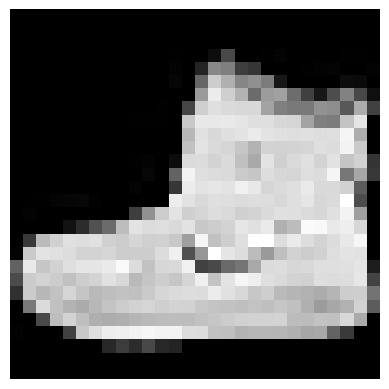

In [ ]:
plt.imshow(image.squeeze(),cmap="grey")
plt.axis(False)


In [ ]:
rand_image_tensor=torch.randn(size=(1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [ ]:
# pass image through model
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

## 7.1 stepping through nn.Conv2d

In [ ]:
torch.manual_seed(42)
# create batch of random images

images=torch.rand(size=(32,3,64,64))
test_image=images[0]


print(f"image batch shape : {images.shape}")
print(f"shape of first single image: {test_image.shape}")






image batch shape : torch.Size([32, 3, 64, 64])
shape of first single image: torch.Size([3, 64, 64])


In [ ]:
# as we created random images so these are random numbers
test_image

tensor([[[0.8823, 0.9150, 0.3829,  ..., 0.1587, 0.6542, 0.3278],
         [0.6532, 0.3958, 0.9147,  ..., 0.2083, 0.3289, 0.1054],
         [0.9192, 0.4008, 0.9302,  ..., 0.5535, 0.4117, 0.3510],
         ...,
         [0.1457, 0.1499, 0.3298,  ..., 0.9624, 0.6400, 0.7409],
         [0.1709, 0.5797, 0.6340,  ..., 0.6885, 0.2405, 0.5956],
         [0.9199, 0.1247, 0.3573,  ..., 0.6752, 0.2058, 0.5027]],

        [[0.1458, 0.9024, 0.9217,  ..., 0.1868, 0.6352, 0.8431],
         [0.9549, 0.4435, 0.6924,  ..., 0.1168, 0.7160, 0.5462],
         [0.1616, 0.1054, 0.8614,  ..., 0.4531, 0.4736, 0.9448],
         ...,
         [0.4309, 0.3986, 0.1907,  ..., 0.9444, 0.2848, 0.3776],
         [0.7948, 0.6855, 0.1009,  ..., 0.6147, 0.7747, 0.2323],
         [0.5840, 0.9795, 0.3277,  ..., 0.3549, 0.1263, 0.1280]],

        [[0.5027, 0.4195, 0.8893,  ..., 0.3084, 0.1567, 0.7860],
         [0.7310, 0.9307, 0.2847,  ..., 0.8432, 0.8307, 0.0897],
         [0.7021, 0.5967, 0.7744,  ..., 0.8485, 0.4520, 0.

In [ ]:
torch.manual_seed(42)
# creatin a single conv2d layer
conv_layer=nn.Conv2d(in_channels=3,
                     out_channels=10,
                     kernel_size=3,
                     stride=1,
                     padding=0 )
conv_output=conv_layer(test_image)
conv_output

tensor([[[ 0.6552,  0.5381,  0.4456,  ...,  0.3679,  0.1734,  0.2343],
         [ 0.4011,  0.2772,  0.4309,  ...,  0.0474,  0.3547,  0.4406],
         [ 0.5072,  0.6963,  0.3967,  ...,  0.5034,  0.3260,  0.4359],
         ...,
         [ 0.3767,  0.4173,  0.7551,  ...,  0.5548,  0.5815,  0.2547],
         [ 0.4143,  0.6770,  0.5922,  ...,  0.7285,  0.3320,  0.5752],
         [ 0.1725,  0.3980,  0.5999,  ...,  0.4316,  0.5133,  0.3385]],

        [[ 0.0954, -0.0688, -0.1089,  ...,  0.0185, -0.4996, -0.0184],
         [-0.0188, -0.1703, -0.1344,  ..., -0.2991, -0.0339,  0.1632],
         [-0.1585, -0.0837, -0.0159,  ...,  0.0026,  0.1540, -0.1372],
         ...,
         [-0.0297, -0.0980, -0.0731,  ...,  0.0623, -0.1080, -0.0946],
         [-0.1508, -0.1934,  0.2011,  ...,  0.0415, -0.0989,  0.2556],
         [ 0.0447,  0.1020, -0.1685,  ...,  0.0908, -0.0682, -0.2266]],

        [[ 0.0098,  0.1790,  0.3092,  ...,  0.2502,  0.2292, -0.0542],
         [-0.0979,  0.1598,  0.1165,  ..., -0

In [ ]:
conv_output.shape,test_image.shape

(torch.Size([10, 62, 62]), torch.Size([3, 64, 64]))

## 7.2 Stepping through MaxPool2d()

In [ ]:
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
# print out test image shape
print(f" Test image shape : {test_image.shape}")

# create sample nn.MaxPool2d layer
max_pool_layer=nn.MaxPool2d(kernel_size=2)

#pass daat through conv_layer
test_image_through_conv_layer=conv_layer(test_image)
print(f"shape of image after passsing through conv_layer : {test_image_through_conv_layer.shape}")

# pass data through mox_pool layer
test_image_through_max_pool_layer=max_pool_layer(test_image_through_conv_layer)

print(f"shape of image after passing through convlayer and  max_pool_layer : {test_image_through_max_pool_layer.shape}")

 Test image shape : torch.Size([3, 64, 64])
shape of image after passsing through conv_layer : torch.Size([10, 62, 62])
shape of image after passing through convlayer and  max_pool_layer : torch.Size([10, 31, 31])


In [ ]:
# close look to what maxpool do
#and doing the same code as we have done above

#create random tensor
A=torch.randn(size=(1,2,2))

# maxpool layer
max_pool_layer=nn.MaxPool2d(kernel_size=2)

A_through_max_pool_layer=max_pool_layer(A)
print(f"Tensor before passin through MaxPool layer: \n {A} ]\n Shape : {A.shape}")
print(f"Tensor after passing through MaxPool layer: \n {A_through_max_pool_layer} \n Shape :{A_through_max_pool_layer.shape}")



Tensor before passin through MaxPool layer: 
 tensor([[[ 1.2135,  0.7924],
         [-0.4401,  0.4996]]]) ]
 Shape : torch.Size([1, 2, 2])
Tensor after passing through MaxPool layer: 
 tensor([[[1.2135]]]) 
 Shape :torch.Size([1, 1, 1])


## 7.3 setup loss function , accuray metric and optimizer

In [ ]:
from helper_functions import accuracy_fn

# loss functionm
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_2.parameters(),
                             lr=0.1)

## 7.4 Training and testing model_2 using `train_step()` and `test_step()` function

In [ ]:
 # set random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# time measurement
from timeit import default_timer as timer
#start train timer
train_time_start_model_2=timer()

#train and test model
epochs=3
for epoch in range(epochs):
  print(f"Epoch: {epoch}\n----")
  train_step(
      model_2,
      train_dataloader,
      loss_fn,
      optimizer,
      accuracy_fn,
      device)
  test_step(
     model_2,
     test_dataloader,
      loss_fn,
      accuracy_fn,
      device)
train_time_end_model_2=timer()
total_train_time_model_2=print_train_time(train_time_start_model_2,
                                            train_time_end_model_2,
                                            device)








Epoch: 0
----
 Train_loss: 0.59308 , Train_acc:  78.48167%
Test loss: 0.39371, Test_accuracy: 85.99241
Epoch: 1
----
 Train_loss: 0.36234 , Train_acc:  86.99167%
Test loss: 0.35205, Test_accuracy: 86.89097
Epoch: 2
----
 Train_loss: 0.32419 , Train_acc:  88.32167%
Test loss: 0.31500, Test_accuracy: 88.38858
Traint ime on : cuda total time: 41.890703 secnds


### Get model_2 results

In [ ]:
model_2_results=eval_model(
    model_2,
    test_dataloader,
    loss_fn,
    accuracy_fn,
    device
)
model_2_results

{'model_name  ': 'FashionMNISTModelV2',
 'model_loss': 0.3149992525577545,
 'model_acc': 88.38857827476038}

In [ ]:
model_0_results

{'model_name  ': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

### 8 Comparing models results and training time


In [ ]:
import pandas as pd
compare_results=pd.DataFrame([model_0_results,
                              model_1_results,
                              model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.457464,83.985623
2,FashionMNISTModelV2,0.314999,88.388578


In [ ]:
#add training time to resulta comparision
compare_results["training_time"]=[total_train_time_model_0,
                                  total_train_time_model_1,
                                  total_train_time_model_2]

compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,32.320505
1,FashionMNISTModelV1,0.457464,83.985623,35.646592
2,FashionMNISTModelV2,0.314999,88.388578,41.890703


Train time for model_2(FashionMNISTModelV2) is a little more higher because it is traind on CPU

In [ ]:
# visualize he results
compare_results.set_index("model_name  ")["model_acc"].plot(kind="barh")
plt.xlabel("Accuracy(%)")
plt.ylabel("Model Names")
plt.show()


## 9 Make and evaluate random predictions with best model

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device : torch.device=device): # Corrected device parameter name

  pred_probs_list=[] # Initialize as an empty list
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      #prepare the sample (add batch dimension and put it on target device)
      sample=torch.unsqueeze(sample,dim=0).to(device)

      #forward pass( will output models war logits )
      pred_logits=model(sample)

      #get predictions probabilities( from logits to -> probabilities )
      # in case of multi class classification problem we are using softmax activation function
      pred_probs_tensor=torch.softmax(pred_logits.squeeze() ,dim=0) # Renamed to avoid conflict

      #get preds_probs off the GPU for further calculations
      pred_probs_list.append(pred_probs_tensor.cpu()) # Append the tensor to the list

    #stack the pred_probs to turn list into tensor
    return torch.stack(pred_probs_list) # Stack the list into a tensor

In [ ]:
# looking at our test data from FashionMNIST


img,label=test_data[0][:5]
img.shape,label

(torch.Size([1, 28, 28]), 9)

In [ ]:
import random
#random.seed(42)
test_samples=[]
test_labels=[]

# we are just randomly sampling 9 samples . means we are picking 9 samples from test data ramdomly
for sample,label in random.sample(list(test_data),k=9):
  test_samples.append(sample) # 9 random samples from test data
  test_labels.append(label) #9 random labels from test data

#view our  first sample image
test_samples[0].shape



torch.Size([1, 28, 28])

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

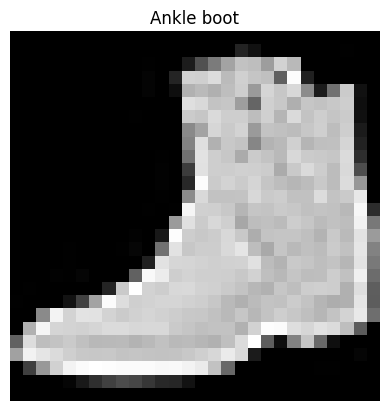

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap="grey")
plt.title(class_names[test_labels[0]])
plt.axis(False)

In [ ]:
# Make prediction
pred_probs=make_predictions(model_2,
                            test_samples,)

# first 2 predictions probabilities
pred_probs[:2]





tensor([[8.5549e-06, 9.9252e-07, 1.7656e-06, 4.7254e-06, 1.8686e-06, 2.9161e-04,
         1.3219e-05, 1.4415e-03, 9.1312e-05, 9.9814e-01],
        [6.0644e-04, 4.3502e-05, 8.9578e-04, 1.0685e-04, 2.9460e-05, 1.2429e-02,
         2.2256e-04, 1.0461e-01, 4.5308e-03, 8.7653e-01]])

In [ ]:
# convert probabilities to labels
pred_labels=torch.argmax(pred_probs,dim=1)
pred_labels,test_labels

(tensor([9, 9, 7, 1, 9, 6, 2, 0, 2]), [9, 9, 7, 1, 9, 6, 2, 0, 2])

# Visualizations

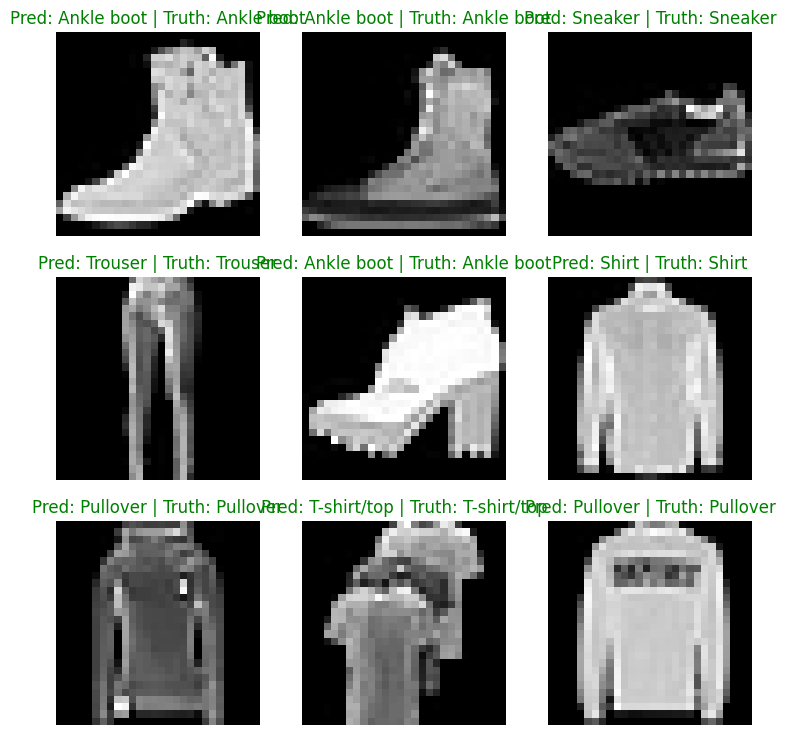

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,9))

rows=3
cols=3

for i ,sample in enumerate(test_samples):
  #create subplot
  plt.subplot(rows,cols,i+1)


  #plot the target image
  plt.imshow(sample.squeeze(), cmap="grey")

  #find the prediction in text
  pred_label=class_names[pred_labels[i]]

  #get the truth label
  truth_label=class_names[test_labels[i]]

  # create title
  title_test= f"Pred: {pred_label} | Truth: {truth_label}"

  #check equality
  if pred_label==truth_label:
    plt.title(title_test,color="green")
  else:
    plt.title(title_test,color="red")

  plt.axis(False);








# 10 Make  a confusion metric for further predictions evaluation


A comfusion matrix is an amazing way  of evaluating your classification model visually .

1. Make prediction with our trained model on test dataset
2. Make confusion matrix `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix`

In [ ]:
# 1. Make predictions
y_preds = [] # Initialize an empty list to store predictions
model_2.eval()
with torch.inference_mode():
  for X,y in test_dataloader:
   #put data on target device
    X,y=X.to(device),y.to(device)

    #forward pass
    y_logits=model_2(X)

    # logits -> prediction  probabilities -> prediction labels
    y_pred_labels=torch.softmax(y_logits, dim=1).argmax(dim=1) # Apply softmax and argmax

    #put prediction on CPU for evaluation
    y_preds.append(y_pred_labels.cpu()) # Append the predictions to the list

  #concatenate  list of predictions into tensor
  y_pred_tensor = torch.cat(y_preds)
  #print(y_pred_tensor)
  y_pred_tensor=torch.cat(y_preds)
  print(y_pred_tensor)

tensor([9, 2, 1,  ..., 8, 1, 5])


In [ ]:
len(y_pred_tensor)

10000

In [ ]:
#install torchmetrics
# check if required package is installed and if not ,install them
try:
  import torchmetrics,mixtend
  print(f"torchmetrics and mixtend are already installed")
  assert int(mlxtend.__version__.split(".")[1]>=19 , 'mlxtend version shouls be 0.19 or higher ')
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics,mlxtend
  print(f"mlxend version : {mlxtend.__version__}")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 30.8 MB/s eta 0:00:00
mlxend version : 0.23.4


In [ ]:
import mlxtend
print(mlxtend.__version__)

0.23.4


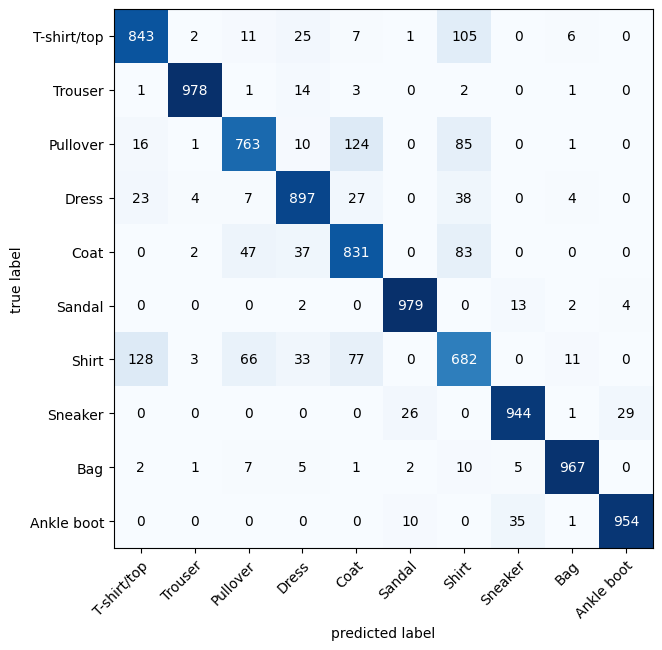

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# setup confusion metrics and compare predictions to target
confmat=ConfusionMatrix(num_classes=len(class_names) , task="multiclass")
confmat_tensor=confmat(preds=y_pred_tensor,
                       target=test_data.targets)

#ploting confusion metrics
fig, ax= plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)





In [ ]:
confmat_tensor

tensor([[843,   2,  11,  25,   7,   1, 105,   0,   6,   0],
        [  1, 978,   1,  14,   3,   0,   2,   0,   1,   0],
        [ 16,   1, 763,  10, 124,   0,  85,   0,   1,   0],
        [ 23,   4,   7, 897,  27,   0,  38,   0,   4,   0],
        [  0,   2,  47,  37, 831,   0,  83,   0,   0,   0],
        [  0,   0,   0,   2,   0, 979,   0,  13,   2,   4],
        [128,   3,  66,  33,  77,   0, 682,   0,  11,   0],
        [  0,   0,   0,   0,   0,  26,   0, 944,   1,  29],
        [  2,   1,   7,   5,   1,   2,  10,   5, 967,   0],
        [  0,   0,   0,   0,   0,  10,   0,  35,   1, 954]])

# 11 Save and load your best performance model


In [ ]:
from pathlib import Path

#create model directory path
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# create model save path
MODEL_NAME="03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

#save the model state dict
print(f"saving model to :{MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict() , f=MODEL_SAVE_PATH)



saving model to :models/03_pytorch_computer_vision_model_2.pth


In [ ]:
  # check if model ia loaded
  #create a new instance
  torch.manual_seed(42)
  loaded_model_2=FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

#load the saved state dict
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# set to target device
loaded_model_2.to(device)


FashionMNISTModelV2(
  (conv_block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
model_2_results

{'model_name  ': 'FashionMNISTModelV2',
 'model_loss': 0.3149992525577545,
 'model_acc': 88.38857827476038}

In [ ]:
#evaluate the loaded model
torch.manual_seed(42)
loaded_model_2_results=eval_model( loaded_model_2,
                                  test_dataloader,
                                   loss_fn,
                                   accuracy_fn)
loaded_model_2_results

{'model_name  ': 'FashionMNISTModelV2',
 'model_loss': 0.3149992525577545,
 'model_acc': 88.38857827476038}

In [ ]:
#check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_mode_2_results["model_loss"]))
